In [22]:
# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import the 'abalone' dataset
abalone = pd.read_csv('./abalone.csv', header=None)
abalone_x = abalone.iloc[:,:-1]
abalone_y = abalone.iloc[:,-1]

# Split 
abalone_x_train, abalone_x_test, abalone_y_train, abalone_y_test = train_test_split(abalone_x,
                                                                                    abalone_y,
                                                                                    test_size=0.2,
                                                                                    shuffle = True,
                                                                                    random_state = 0)

# Homework 2
Author: Mao Nishino

## Problem Statement
In this problem we use the abalone dataset available on Canvas. The dataset
is about predicting the age of the abalone from its physical measurements. Use the first 7 variables as predictors and the 8-th as the response.
Report all results as the average of 20 random splits. For each random split divide the data at random into 85% for training and 15% for testing, train the models and compute the training error and the test error (or R2) for that split. Repeat this process 20 times obtaining 20 different random splits of the data and report the average training or test MSE or R2 obtained over the 20 splits for the following models.

## Problem (a)


Null model. Report the average train and test MSE of the null model that always
predicts training  ̄y (average training y). (1 point)

In [13]:
# Calculate the average y-value in the training set
y_bar = abalone_y_train.mean()

# Create the prediction
y_train_pred = np.full(len(abalone_x_train), y_bar)
y_test_pred = np.full(len(abalone_x_test), y_bar)

# Find the training and the MSEs
train_mse = mean_squared_error(abalone_y_train, y_train_pred)
test_mse = mean_squared_error(abalone_y_test, y_test_pred)

# Create a dataframe to show the result
table = {
    'Dataset': ['Train', 'Test'],
    'Mean Squared Error': [train_mse, test_mse]
}

print('The following table shows the desired MSEs.')
null_mses = pd.DataFrame(table)
null_mses

The following table shows the desired MSEs.


10.875555332991057

## Problem (b)
OLS regression, analytic, by solving the normal equations, with λ = 0.0001.
Report the average training and test R2 and MSE. (2 points)

In [50]:
# Calculate B = X^TX+lambda*I_p
B = np.matmul(abalone_x_train.T, abalone_x_train) + 0.0001*np.eye(abalone_x_train.shape[1])

# Calculate the coefficients using the normal equation beta = B^{-1}X^T y
invBX = np.matmul(np.linalg.inv(B), abalone_x_train.T)
beta = np.matmul(invBX, abalone_y_train)

# Create predictions
y_train_pred = np.matmul(abalone_x_train, beta)
y_test_pred = np.matmul(abalone_x_test, beta)

# Find the training and the MSEs/R2
train_mse = mean_squared_error(abalone_y_train, y_train_pred)
test_mse = mean_squared_error(abalone_y_test, y_test_pred)
train_r2 = r2_score(abalone_y_train, y_train_pred)
test_r2 = r2_score(abalone_y_test, y_test_pred)

# Create a dataframe to show the result
table = {
    'Dataset': ['Train', 'Test'],
    'Mean Squared Error': [train_mse, test_mse],
    'R squared': [train_r2, test_r2]
}

print('The following table shows the desired MSEs and R2s.')
df = pd.DataFrame(table)
df

The following table shows the desired MSEs and R2s.


,Dataset,Mean Squared Error,R squared
0,Train,5.018612,0.511463
1,Test,5.218919,0.519450


## Problem (c)

### Problem Statement
Regression tree of maximum depth 1, 2, .... up to 7, for a total of 7 regression
trees. On the same plot, plot the average training and test R2 vs the tree depth.
On another plot, plot the average training and test MSE vs the tree depth, and
show the null model MSE from a) as a horizontal line. (3 points)

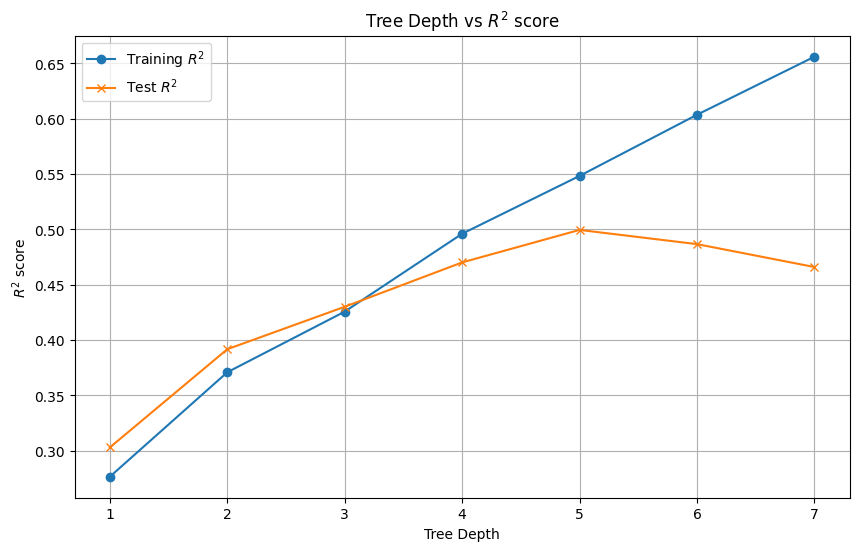

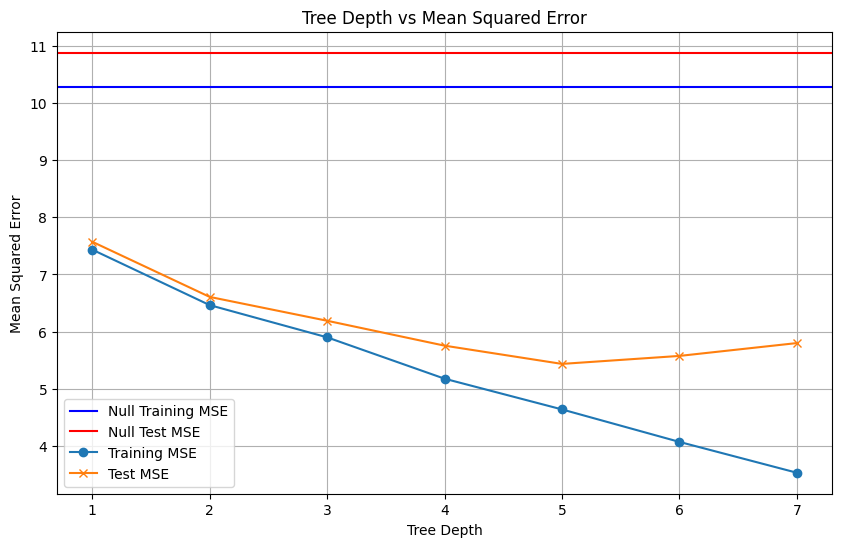

In [20]:
train_R2s = []
test_R2s = []
train_MSEs = []
test_MSEs = []

# Train - predict - record the result
for depth in range(1,8):
    regtree = DecisionTreeRegressor(max_depth = depth, random_state = 0)
    regtree = regtree.fit(abalone_x_train, abalone_y_train)

    y_train_pred = regtree.predict(abalone_x_train)
    y_test_pred = regtree.predict(abalone_x_test)

    train_R2s.append(r2_score(abalone_y_train, y_train_pred))
    test_R2s.append(r2_score(abalone_y_test, y_test_pred))

    train_MSEs.append(mean_squared_error(abalone_y_train, y_train_pred))
    test_MSEs.append(mean_squared_error(abalone_y_test, y_test_pred))

# Plot R^2
plt.figure(figsize = (10,6))
plt.plot(range(1,8), train_R2s, marker='o', label = 'Training $R^2$')
plt.plot(range(1,8), test_R2s, marker='x', label = 'Test $R^2$')
plt.xlabel('Tree Depth')
plt.ylabel('$R^2$ score')
plt.title('Tree Depth vs $R^2$ score')
plt.grid(True)
plt.legend()
plt.show()

# Plot MSEs 
plt.figure(figsize = (10,6))
plt.axhline(null_mses[null_mses['Dataset'] == 'Train']['Mean Squared Error'].iloc[0],
             label = 'Null Training MSE', color = 'b') 
plt.axhline(null_mses[null_mses['Dataset'] == 'Test']['Mean Squared Error'].iloc[0],
             label = 'Null Test MSE', color = 'r') 
plt.plot(range(1,8), train_MSEs, marker='o', label = 'Training MSE')
plt.plot(range(1,8), test_MSEs, marker='x', label = 'Test MSE')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Tree Depth vs Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

## Problem (d)

### Problem Statement
Random forest regression with 10, 30, 100 and 300 trees. Report the average
training and test R2 and MSE in each case. (3 points)


In [28]:
num_trees = [10, 30, 100, 300]

train_R2s = []
test_R2s = []
train_MSEs = []
test_MSEs = []

for num_tree in num_trees:
    regforest = RandomForestRegressor(n_estimators = num_tree,
                                      random_state = 0)
    regforest.fit(abalone_x_train, abalone_y_train)
    
    y_train_pred = regforest.predict(abalone_x_train)
    y_test_pred = regforest.predict(abalone_x_test)

    train_R2s.append(r2_score(abalone_y_train, y_train_pred))
    test_R2s.append(r2_score(abalone_y_test, y_test_pred))
    train_MSEs.append(mean_squared_error(abalone_y_train, y_train_pred))
    test_MSEs.append(mean_squared_error(abalone_y_test, y_test_pred))

table = {
    'Number of Tress' : num_trees,
    'Training R^2' : train_R2s,
    'Test R^2' : test_R2s,
    'Training MSE' : train_MSEs,
    'Test MSE' : test_MSEs
}
df = pd.DataFrame(table)

print('The following shows the training and the test R^2s and the MSEs.')
df

The following shows the training and the test R^2s and the MSEs.


,Number of Tress,Training R^2,Test R^2,Training MSE,Test MSE
0,10,0.910951,0.529186,0.914780,5.113182
1,30,0.929290,0.565466,0.726383,4.719179
2,100,0.934943,0.566917,0.668312,4.703416
3,300,0.936898,0.566588,0.648233,4.706993
